In [17]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

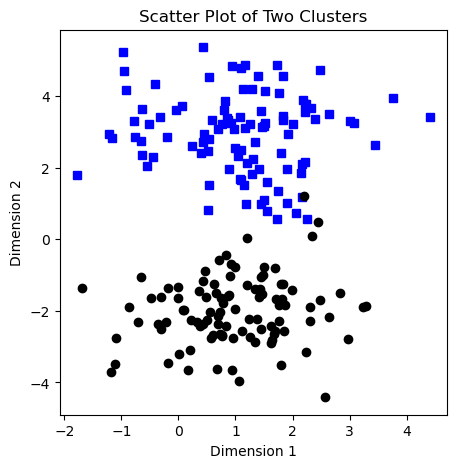

In [18]:
# Define the number of data points per cluster and the blur (standard deviation).
num_points_per_cluster = 100
standard_deviation = 1

# Define cluster centers cluster_A and cluster_B as coordinates.
cluster_A_center = [1, 3]
cluster_B_center = [1, -2]

# Generate data points for cluster A with added Gaussian noise.
cluster_A_data = [cluster_A_center[0] + np.random.randn(num_points_per_cluster) * standard_deviation,
                   cluster_A_center[1] + np.random.randn(num_points_per_cluster) * standard_deviation]

# Generate data points for cluster B with added Gaussian noise.
cluster_B_data = [cluster_B_center[0] + np.random.randn(num_points_per_cluster) * standard_deviation,
                   cluster_B_center[1] + np.random.randn(num_points_per_cluster) * standard_deviation]

# True labels: concatenate zeros for cluster A and ones for cluster B into a matrix.
labels_np = np.vstack((np.zeros((num_points_per_cluster, 1)), np.ones((num_points_per_cluster, 1))))

# Concatenate data points from clusters A and B into a matrix.
data_np = np.hstack((cluster_A_data, cluster_B_data)).T

# Convert the data to a PyTorch tensor and labels to PyTorch tensor as well.
custom_data = torch.tensor(data_np).float()
custom_labels = torch.tensor(labels_np).float()

# Show the data using a scatter plot.
fig = plt.figure(figsize=(5, 5))
plt.plot(custom_data[np.where(custom_labels == 0)[0], 0], custom_data[np.where(custom_labels == 0)[0], 1], 'bs')
plt.plot(custom_data[np.where(custom_labels == 1)[0], 0], custom_data[np.where(custom_labels == 1)[0], 1], 'ko')
plt.title('Scatter Plot of Two Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [19]:
# Define a function to create a custom ANN model with a specified learning rate.
def create_custom_ann_model(learning_rate):
    # Define the model architecture using a sequential container.
    custom_model = nn.Sequential(
        nn.Linear(2, 16),   # Input layer with 2 input features and 16 hidden units.
#         nn.ReLU(),          # ReLU activation function.
        nn.Linear(16, 1),   # Hidden layer with 16 hidden units and 1 output unit.
#         nn.ReLU(),          # ReLU activation function.
        nn.Linear(1, 1),    # Output layer with 1 output unit.
        nn.Sigmoid()        # Sigmoid activation function for binary classification.
    )

    # Define the loss function for binary classification (better to use BCEWithLogitsLoss).
    custom_loss_function = nn.BCELoss()

    # Define the optimizer using stochastic gradient descent (SGD).
    custom_optimizer = torch.optim.SGD(custom_model.parameters(), lr=learning_rate)

    return custom_model, custom_loss_function, custom_optimizer


In [20]:
# Define a fixed number of training epochs.
num_training_epochs = 1000

# Define a function to train the custom ANN model.
def train_custom_ann_model(custom_model):
    # Initialize a tensor to store the losses during training.
    custom_training_losses = torch.zeros(num_training_epochs)

    # Loop over epochs for training.
    for epoch in range(num_training_epochs):
        # Forward pass: Compute predictions using the custom model.
        custom_predicted_labels = custom_model(custom_data)

        # Compute the loss using the defined loss function.
        custom_loss = custom_loss_function(custom_predicted_labels, custom_labels)
        custom_training_losses[epoch] = custom_loss

        # Backpropagation: Zero the gradients, perform backward pass, and update model parameters.
        custom_optimizer.zero_grad()
        custom_loss.backward()
        custom_optimizer.step()

    # Final forward pass to make predictions after training.
    custom_final_predictions = custom_model(custom_data)

    # Calculate and report the total accuracy of the model.
    custom_accuracy = 100 * torch.mean(((custom_final_predictions > 0.5) == custom_labels).float())

    return custom_training_losses, custom_final_predictions, custom_accuracy


Final accuracy of the custom ANN model: 99%


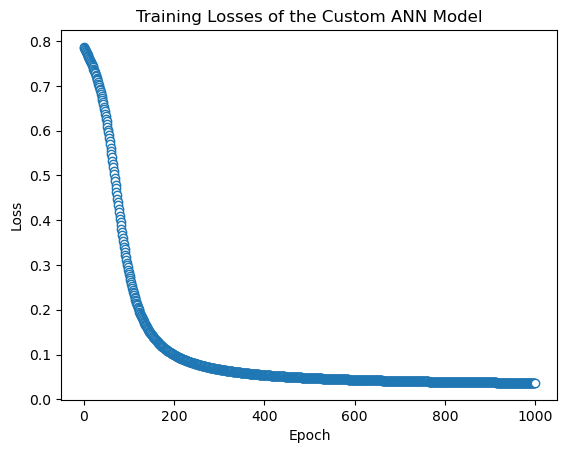

In [21]:
# Create the custom ANN model, loss function, and optimizer with a specified learning rate.
custom_ann_model, custom_loss_function, custom_optimizer = create_custom_ann_model(0.01)

# Train the custom ANN model and obtain training losses, final predictions, and accuracy.
custom_training_losses, custom_final_predictions, custom_accuracy = train_custom_ann_model(custom_ann_model)

# Report the final accuracy of the custom ANN model.
print('Final accuracy of the custom ANN model: %g%%' % custom_accuracy)

# Plot the training losses during training.
plt.plot(custom_training_losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses of the Custom ANN Model')
plt.show()


In [22]:
# Define a range of learning rates to test.
custom_learning_rates = np.linspace(0.001, 0.1, 50)

# Initialize lists to store accuracy and losses for different learning rates.
custom_accuracy_by_lr = []
custom_all_losses = np.zeros((len(custom_learning_rates), num_training_epochs))

# Loop through different learning rates and train custom ANN models.
for i, lr in enumerate(custom_learning_rates):
    # Create and train a custom ANN model for the current learning rate.
    custom_ann_model, custom_loss_function, custom_optimizer = create_custom_ann_model(lr)
    custom_losses, _, custom_acc = train_custom_ann_model(custom_ann_model)
    
    # Append accuracy and losses to the respective lists.
    custom_accuracy_by_lr.append(custom_acc)
    custom_all_losses[i, :] = custom_losses.detach()


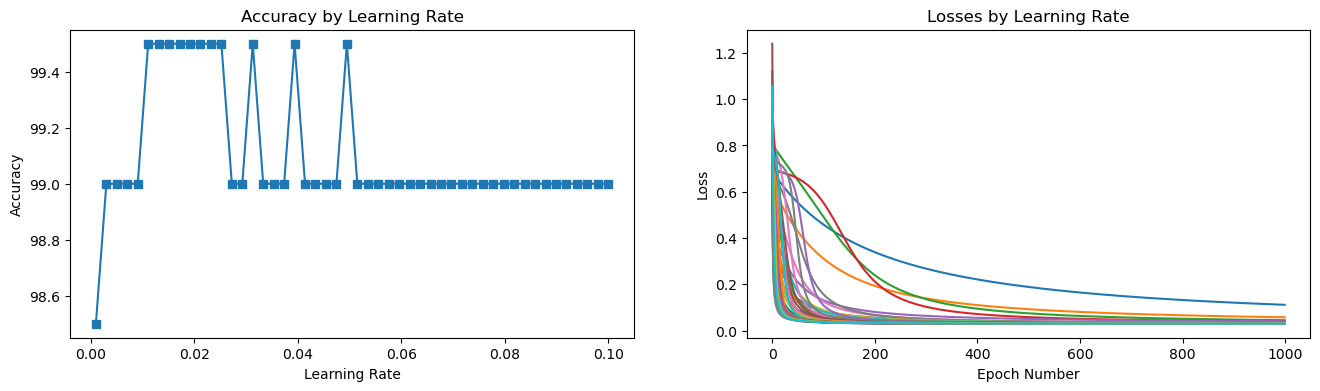

In [23]:
# Create subplots for accuracy and losses.
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Plot accuracy by learning rate.
ax[0].plot(custom_learning_rates, custom_accuracy_by_lr, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

# Plot losses by learning rate.
ax[1].plot(custom_all_losses.T)
ax[1].set_title('Losses by Learning Rate')
ax[1].set_xlabel('Epoch Number')
ax[1].set_ylabel('Loss')
plt.show()


In [24]:
# Report the accuracy for different learning rates.
custom_accuracy_by_lr

# Calculate the proportion of runs where the model had at least 70% accuracy.
proportion_of_runs_above_70 = sum(torch.tensor(custom_accuracy_by_lr) > 70) / len(custom_accuracy_by_lr)
proportion_of_runs_above_70


tensor(1.)